In [1]:
from bias_tree import BiasDetectionTree, get_metric_bias_tree_for_model
from data_preparation.movielens_100k import MovieLens100KData
from recommender.factorization_recommender import tune_recommendation_hyperparams

C:\Users\Asia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Asia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Asia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Asia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Asia\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 fro

ImportError: cannot import name 'preprocessing' from 'tensorflow.keras.layers.experimental' (C:\Users\Asia\Anaconda3\lib\site-packages\tensorflow_core\python\keras\api\_v1\keras\layers\experimental\__init__.py)

### Prepare training data

In [2]:
data = MovieLens100KData(data_path='data/ml-100k')
X_train, X_val, X_test = data.get_data_splits_for_training()

### Train MF recommendation model

In [3]:
EMBEDDING_SIZE = 50
NUM_EPOCH = 20
REGULARIZATION = 1e-6
LEARNING_RATE = 0.001

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 20000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/sample - loss: 11.9704 - val_loss: 10.3293
Epoch 2/20
60000/60000 [==============================] - 2s 33us/sample - loss: 8.9324 - val_loss: 7.6653
Epoch 3/20
60000/60000 [==============================] - 2s 27us/sample - loss: 6.5709 - val_loss: 5.6119
Epoch 4/20
60000/60000 [==============================] - 2s 29us/sample - loss: 4.7794 - val_loss: 4.0802
Epoch 5/20
60000/60000 [==============================] - 2s 29us/sample - loss: 3.4663 - val_loss: 2.9795
Epoch 6/20
60000/60000 [==============================] - 2s 31us/sample - loss: 2.5482 - val_loss: 2.2322
Epoch 7/20
60000/60000 [==============================] - 2s 30us/sample - loss: 1.9434 - val_loss: 1.7526


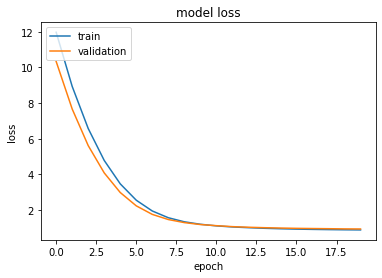

In [4]:
model = fit_recommendation_model(X_train, X_val, num_users=data.num_users, num_items=data.num_items, 
                                 epochs=NUM_EPOCH, embedding_size=EMBEDDING_SIZE, 
                                 regularization_coef=REGULARIZATION,
                                 lr=LEARNING_RATE)

### Analyze bias for the recommendation model

In [5]:
MIN_CHILD_NODE_SIZE = 1000
METRIC = 'squared_error'

root=[]: 0.948
├── year_bucketized=['high']: 1.1
│   ├── Thriller=[0]: 1.18
│   └── Thriller=[1]: 0.958
├── year_bucketized=['low']: 0.855
│   ├── gender=['F']: 1.018
│   └── gender=['M']: 0.805
└── year_bucketized=['medium']: 0.956
    ├── gender=['F']: 1.084
    └── gender=['M']: 0.911
        ├── Action=[0]: 0.935
        └── Action=[1]: 0.838



,count,mean,std,min,25%,50%,75%,max
node_rules,,,,,,,,
"{""year_bucketized"": [""low""], ""gender"": [""M""]}",5201.0,0.804998,1.205988,3.007017e-09,0.080459,0.377467,1.037013,12.389457
"{""year_bucketized"": [""medium""], ""gender"": [""M""], ""Action"": [1]}",1758.0,0.837684,1.161810,4.456524e-11,0.079903,0.384285,1.096151,9.878459
"{""year_bucketized"": [""medium""], ""gender"": [""M""], ""Action"": [0]}",5344.0,0.934846,1.427162,3.991795e-08,0.082684,0.399433,1.201620,13.798442
"{""year_bucketized"": [""high""], ""Thriller"": [1]}",1292.0,0.957901,1.361507,2.536490e-08,0.113758,0.464079,1.293166,13.893541
"{""year_bucketized"": [""low""], ""gender"": [""F""]}",1593.0,1.017535,1.526791,2.073739e-08,0.096815,0.468901,1.263261,14.233174
"{""year_bucketized"": [""medium""], ""gender"": [""F""]}",2498.0,1.084445,1.595557,1.146990e-06,0.100856,0.484357,1.405786,13.902967
"{""year_bucketized"": [""high""], ""Thriller"": [0]}",2314.0,1.180113,1.591849,5.879252e-08,0.116758,0.547972,1.572163,10.670153


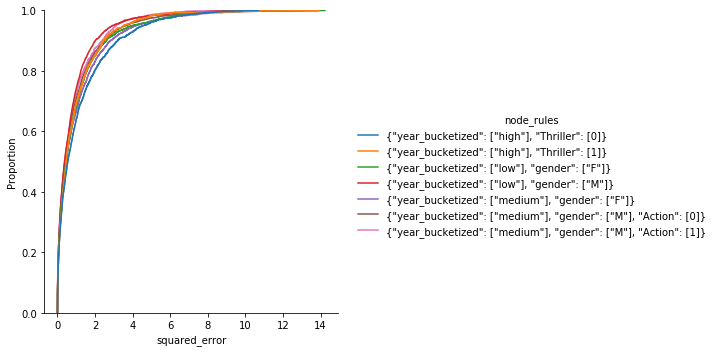

In [6]:
bias_tree_test = get_metric_bias_tree_for_model(model, X_test, data.attributes_dict, 
                                                 metric_name=METRIC,
                                                min_child_node_size=MIN_CHILD_NODE_SIZE)
display(bias_tree_test.leaf_metrics)

Show the node with highest error

In [7]:
print(bias_tree_test.max_metric_node, round(bias_tree_test.max_metric_value, 3))

{"year_bucketized": ["high"], "Thriller": [0]} 1.18


### Retrain the model on the most biased node

Train on 7167 samples, validate on 2398 samples
Epoch 1/10
7167/7167 [==============================] - 0s 30us/sample - loss: 1.0338 - val_loss: 1.1047
Epoch 2/10
7167/7167 [==============================] - 0s 29us/sample - loss: 1.0166 - val_loss: 1.0911
Epoch 3/10
7167/7167 [==============================] - 0s 36us/sample - loss: 1.0090 - val_loss: 1.0879
Epoch 4/10
7167/7167 [==============================] - 0s 37us/sample - loss: 0.9913 - val_loss: 1.0829
Epoch 5/10
7167/7167 [==============================] - 0s 30us/sample - loss: 0.9916 - val_loss: 1.0862
Epoch 6/10
7167/7167 [==============================] - 0s 30us/sample - loss: 0.9811 - val_loss: 1.0755
Epoch 7/10
7167/7167 [==============================] - 0s 30us/sample - loss: 0.9705 - val_loss: 1.0663
Epoch 8/10
7167/7167 [==============================] - 0s 29us/sample - loss: 0.9587 - val_loss: 1.0719
Epoch 9/10
7167/7167 [==============================] - 0s 29us/sample - loss: 0.9566 - val_loss: 1.0757
Epoch 1

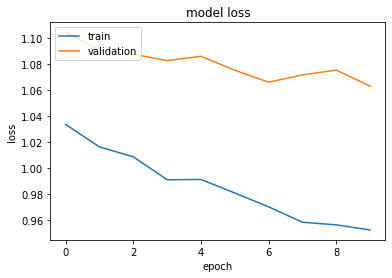

root=[]: 0.95
├── gender=['F']: 1.081
│   ├── age_bucketized=['high', 'medium']: 1.028
│   └── age_bucketized=['low']: 1.192
└── gender=['M']: 0.906
    ├── year_bucketized=['high']: 1.042
    ├── year_bucketized=['low']: 0.823
    └── year_bucketized=['medium']: 0.916
        ├── Action=[0]: 0.942
        └── Action=[1]: 0.838



,count,mean,std,min,25%,50%,75%,max
node_rules,,,,,,,,
"{""gender"": [""M""], ""year_bucketized"": [""low""]}",5201.0,0.823476,1.216129,5.115908e-13,0.082238,0.384375,1.059815,12.309486
"{""gender"": [""M""], ""year_bucketized"": [""medium""], ""Action"": [1]}",1758.0,0.837971,1.160372,4.623589e-07,0.080231,0.381553,1.101643,10.201421
"{""gender"": [""M""], ""year_bucketized"": [""medium""], ""Action"": [0]}",5344.0,0.941619,1.432338,4.488413e-09,0.084200,0.392336,1.206259,13.569970
"{""gender"": [""F""], ""age_bucketized"": [""high"", ""medium""]}",3453.0,1.027915,1.462713,6.571099e-11,0.108690,0.478304,1.343636,11.796136
"{""gender"": [""M""], ""year_bucketized"": [""high""]}",2594.0,1.041893,1.431669,4.846697e-09,0.107942,0.492413,1.376296,12.098804
"{""gender"": [""F""], ""age_bucketized"": [""low""]}",1650.0,1.192115,1.828901,4.162323e-07,0.110621,0.519192,1.474709,14.894897


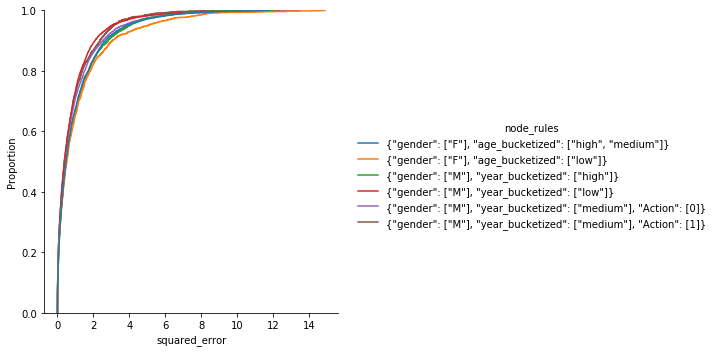

In [8]:
X_train_filtered = bias_tree_test.get_filtered_df(bias_tree_test.max_metric_node,  X_train)
X_val_filtered = bias_tree_test.get_filtered_df(bias_tree_test.max_metric_node,  X_val)

model_bias = retrain_recommendation_model(X_train_filtered, X_val_filtered, model=model, epochs=10)
bias_tree_test_retrained = get_metric_bias_tree_for_model(model_bias, X_test, data.attributes_dict, 
                                                 metric_name=METRIC, min_child_node_size=MIN_CHILD_NODE_SIZE,)
display(bias_tree_test_retrained.leaf_metrics)

In [13]:
node_metric_after_retraining = bias_tree_test_retrained.get_filtered_df(bias_tree_test.max_metric_node,  X_test)[METRIC].mean()
print(f'Diff in error for the most biased node:\n {bias_tree_test.max_metric_node}:\
      {round(100 * (node_metric_after_retraining - bias_tree_test.max_metric_value) / bias_tree_test.max_metric_value, 2)}%')

Diff in error for the most biased node:
 {"year_bucketized": ["high"], "Thriller": [0]}:      -3.69%


In [14]:
node_metric_after_retraining

1.1365659481248973